## Analyzing the AQI values of different periods

#### In this study, AQI_Max values from different periods have been analyzed. The analyzed periods include pre-pandemic, pandemic, post-pandemic, weekdays, weekends, and various days of the week.

- The dataset used in this study can be accessed from the link below:

https://github.com/suheylcavusoglu/air-quality-EDA/blob/main/kocaeli_aqi.csv


In [1]:
# Libraries used in the study;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, kstest, kruskal, mannwhitneyu

## Separation of Data by Periods (Pre-pandemic, Pandemic and Post-pandemic)

- For our analysis, we divided the dataset into pre-pandemic, pandemic, and post-pandemic periods. When making this distinction, we set the start date of the pandemic as March 11, 2020, which is the date of the first COVID-19 announcement by the Ministry of Health, and the end date of the pandemic as July 1, 2021, when COVID-19 restrictions in Turkey came to an end.

In [2]:
df_aqi = pd.read_csv('kocaeli_aqi.csv')
df_aqi['Date'] = pd.to_datetime(df_aqi['Date'])

pre_pandemic = df_aqi[(df_aqi['Date'] < '2020-03-11')]
pandemic = df_aqi[(df_aqi['Date'] >= '2020-03-11') & (df_aqi['Date'] <= '2021-07-01')]
post_pandemic = df_aqi[(df_aqi['Date'] > '2021-07-01')]

- Let's examine the averages and medians of AQI_Max values for each period.

In [3]:
periods = [pre_pandemic, pandemic, post_pandemic]
period_labels = ['Pre-Pandemic', 'Pandemic', 'Post-Pandemic']

for data, label in zip(periods, period_labels):
    avg = data['AQI_Max'].mean()
    median = data['AQI_Max'].median()
    print(f'{label} - Average: {avg:.2f}, Median: {median:.2f}')

Pre-Pandemic - Average: 69.47, Median: 63.00
Pandemic - Average: 60.31, Median: 56.00
Post-Pandemic - Average: 62.11, Median: 58.00


- It is seen that AQI_Max values decreased during the pandemic period and increased slightly after the pandemic.

#### Comparison with Boxplots

- We can compare the AQI_Max values for the pre-pandemic, pandemic period, and post-pandemic period using boxplot graphs. This visual representation helps us visualize the distributions of AQI_Max values in different periods.

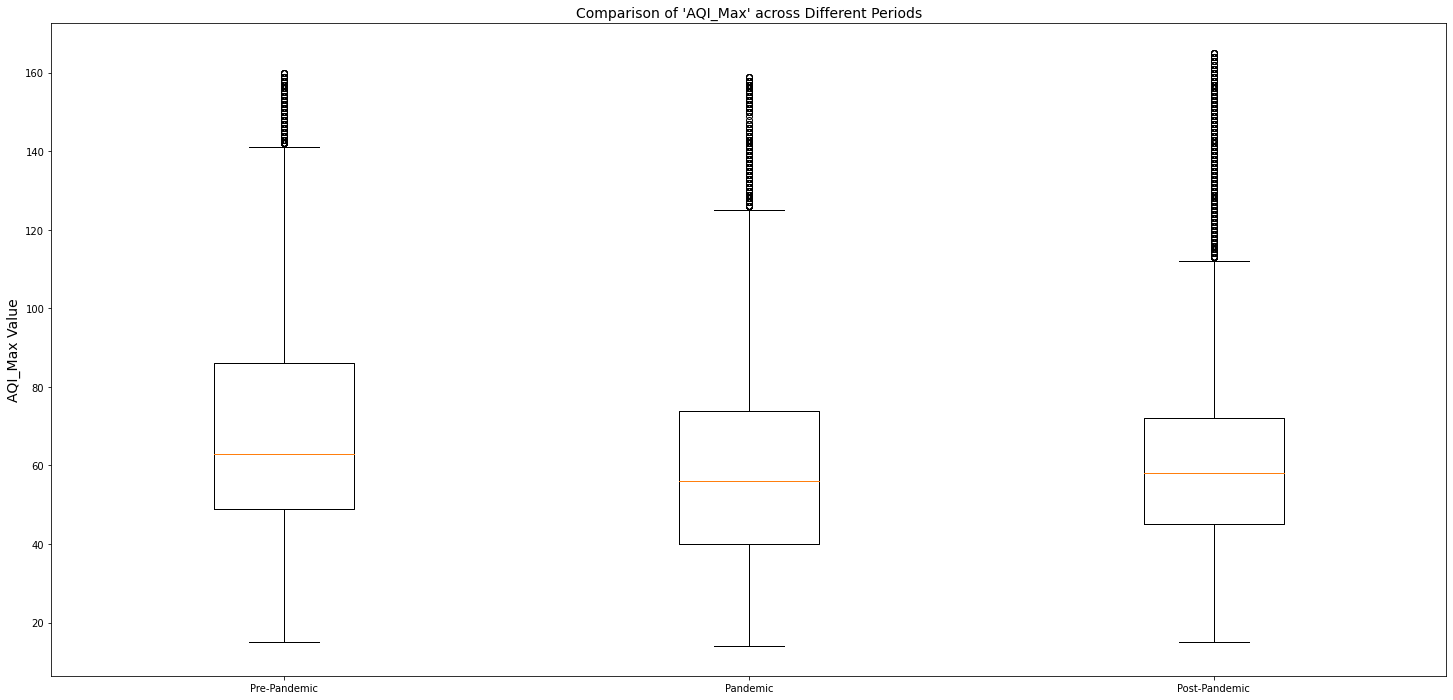

In [4]:
plt.figure(figsize=(25, 12))
plt.boxplot([pre_pandemic['AQI_Max'], pandemic['AQI_Max'], post_pandemic['AQI_Max']], labels=['Pre-Pandemic', 'Pandemic', 'Post-Pandemic'])
plt.title("Comparison of 'AQI_Max' across Different Periods", fontsize=14)
plt.ylabel('AQI_Max Value', fontsize=14)

plt.show()

- As evident from the boxplots, there is a decrease in AQI_Max values during the pandemic period compared to the pre-pandemic period. In the post-pandemic period, a slight increase in AQI_Max values is observed. 
- To better understand these differences, statistical tests can be conducted. For example, t-tests can be applied to the AQI_Max values for each period to determine if there is a statistical difference.

- To apply the t-test, it is necessary for the data set to follow a normal distribution. Normality tests such as the Shapiro-Wilk test or Kolmogorov-Smirnov test can be used. 
- Since our data set has a relatively large number of observations, the Kolmogorov-Smirnov test is more appropriate. 

The necessary code for applying the Kolmogorov-Smirnov test is provided below.

#### Kolmogorov-Smirnov (KS) Test for Normality

In [5]:
ks_stat_pre, ks_p_pre = kstest(pre_pandemic['AQI_Max'], 'norm')
print(f"Kolmogorov-Smirnov Test for Pre-Pandemic Data:\nStatistic: {ks_stat_pre}, P-Value: {ks_p_pre}")
if ks_p_pre > 0.05:
    print("Pre-Pandemic AQI_Max data seems to be normally distributed.")
else:
    print("Pre-Pandemic AQI_Max data does not appear to be normally distributed.")

ks_stat_pandemic, ks_p_pandemic = kstest(pandemic['AQI_Max'], 'norm')
print(f"\nKolmogorov-Smirnov Test for Pandemic Data:\nStatistic: {ks_stat_pandemic}, P-Value: {ks_p_pandemic}")
if ks_p_pandemic > 0.05:
    print("Pandemic AQI_Max data seems to be normally distributed.")
else:
    print("Pandemic AQI_Max data does not appear to be normally distributed.")

ks_stat_post, ks_p_post = kstest(post_pandemic['AQI_Max'], 'norm')
print(f"\nKolmogorov-Smirnov Test for Post-Pandemic Data:\nStatistic: {ks_stat_post}, P-Value: {ks_p_post}")
if ks_p_post > 0.05:
    print("Post-Pandemic AQI_Max data seems to be normally distributed.")
else:
    print("Post-Pandemic AQI_Max data does not appear to be normally distributed.")

Kolmogorov-Smirnov Test for Pre-Pandemic Data:
Statistic: 1.0, P-Value: 0.0
Pre-Pandemic AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Pandemic Data:
Statistic: 1.0, P-Value: 0.0
Pandemic AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Post-Pandemic Data:
Statistic: 1.0, P-Value: 0.0
Post-Pandemic AQI_Max data does not appear to be normally distributed.


If we examine the results of the Kolmogorov-Smirnov test:

- Statistic: The statistic of the Kolmogorov-Smirnov test measures the lack of fit of the data to a normal distribution, and it takes a value between 0 and 1. The larger the statistic, the less the data conforms to a normal distribution. The highest possible value, 1, represents the greatest difference between the observed distribution of data and the expected normal distribution. Therefore, when the statistic value is very close to 1, it indicates that the data does not fit a normal distribution well. Thus, based on the results of the Kolmogorov-Smirnov test, when the statistic value is very close to 1, we can conclude that the data does not conform to a normal distribution.

- P-Value: The p-value represents the probability that the data conforms to a normal distribution. A lower p-value is considered stronger evidence that the data does not follow a normal distribution. It is typically compared to a specific alpha level (e.g., 0.05). If the p-value is smaller than the alpha level (p < 0.05), the null hypothesis is rejected. In other words, it is considered stronger evidence that the data does not follow a normal distribution. The null hypothesis represents the scenario where the data does not follow a normal distribution, while the alternative hypothesis claims that the data follows a normal distribution.

In conclusion, the Kolmogorov-Smirnov test results for all three periods are the same, indicating that the data does not conform to a normal distribution. Therefore, instead of a parametric test like the t-test, a non-parametric test such as the Kruskal-Wallis or Mann-Whitney U test should be used to assess statistical differences between the data sets.

- Let's observe how far the data sets are from normal distribution with histograms.

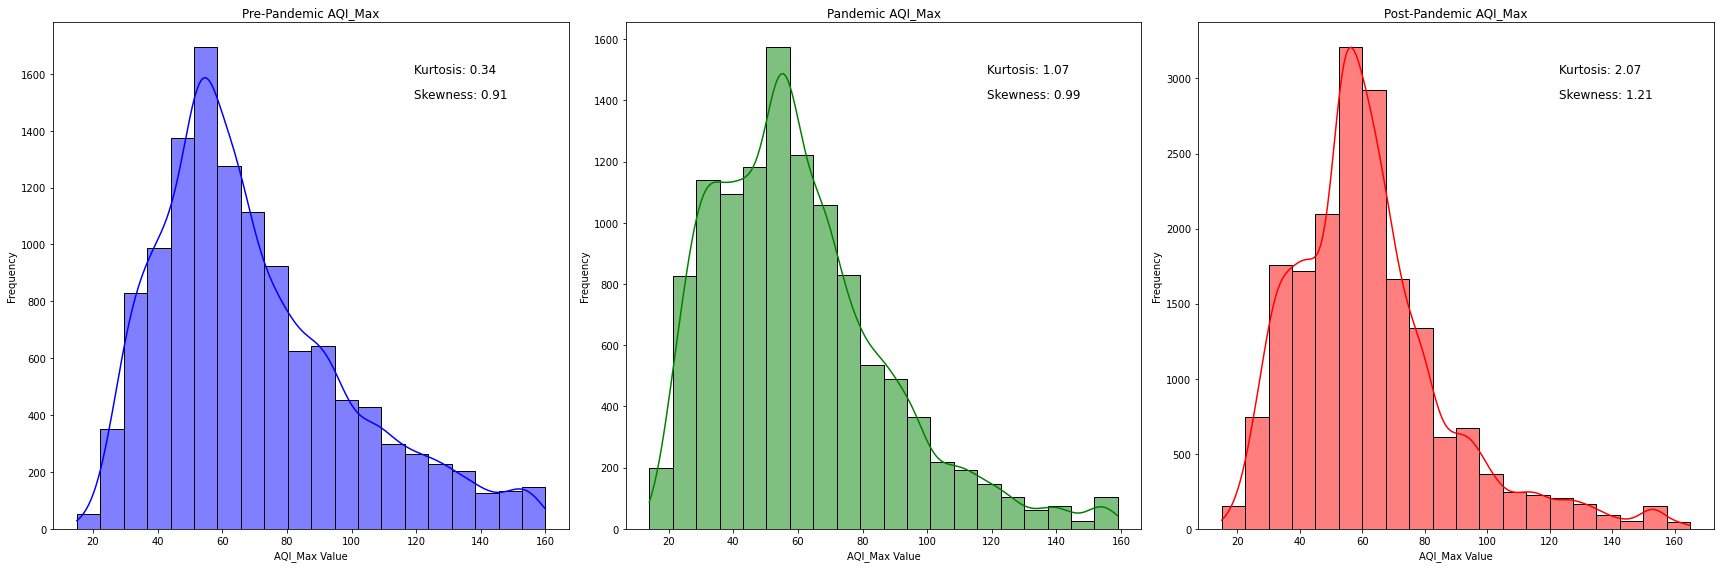

In [6]:
pre_pandemic_data = pre_pandemic['AQI_Max']
pandemic_data = pandemic['AQI_Max']
post_pandemic_data = post_pandemic['AQI_Max']

plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
sns.histplot(pre_pandemic_data, bins=20, color='blue', kde=True)
plt.title("Pre-Pandemic AQI_Max")
plt.xlabel('AQI_Max Value')
plt.ylabel('Frequency')

pre_pandemic_kurtosis = kurtosis(pre_pandemic_data)
pre_pandemic_skewness = skew(pre_pandemic_data)

plt.text(0.7, 0.9, f'Kurtosis: {pre_pandemic_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Skewness: {pre_pandemic_skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.subplot(1, 3, 2)
sns.histplot(pandemic_data, bins=20, color='green', kde=True)
plt.title("Pandemic AQI_Max")
plt.xlabel('AQI_Max Value')
plt.ylabel('Frequency')

pandemic_kurtosis = kurtosis(pandemic_data)
pandemic_skewness = skew(pandemic_data)

plt.text(0.7, 0.9, f'Kurtosis: {pandemic_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Skewness: {pandemic_skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.subplot(1, 3, 3)
sns.histplot(post_pandemic_data, bins=20, color='red', kde=True)
plt.title("Post-Pandemic AQI_Max")
plt.xlabel('AQI_Max Value')
plt.ylabel('Frequency')

post_pandemic_kurtosis = kurtosis(post_pandemic_data)
post_pandemic_skewness = skew(post_pandemic_data)

plt.text(0.7, 0.9, f'Kurtosis: {post_pandemic_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Skewness: {post_pandemic_skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show();

Pre-Pandemic (Blue):
- The distribution is slightly skewed to the left (positive skewness).
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.


Pandemic Period (Green):
- The distribution looks more symmetrical but still slightly skewed to the left.
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.


Post-Pandemic (Red):
- The distribution is skewed to the left rather than symmetric.
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.


In summary, AQI_Max values for all three periods deviate from normal distribution. Skewness and kurtosis values express quantitatively how these distributions differ from the normal distribution.

### Kruskal-Wallis Test

- Let's apply the Kruskal-Wallis test to determine if there is a significant difference in AQI_Max values across the three different periods.

In [7]:
statistic, p_value = kruskal(pre_pandemic['AQI_Max'], pandemic['AQI_Max'], post_pandemic['AQI_Max'])

print(f"Kruskal-Wallis Test Statistic: {statistic:.2f}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The Null Hypothesis (H0) is rejected. There is a statistically significant difference between the three periods.")
else:
    print("The Null Hypothesis (H0) is accepted. There is no statistically significant difference between the three periods.")

Kruskal-Wallis Test Statistic: 639.10
P-Value: 1.6677875397561815e-139
The Null Hypothesis (H0) is rejected. There is a statistically significant difference between the three periods.


- The "Test Statistic" value obtained from the Kruskal-Wallis test is a statistic calculated by this statistical test. This value measures the differences and diversity among the data groups.

- A high Kruskal-Wallis test statistic indicates a significant difference between the groups, implying that the median AQI_Max values of the groups are significantly different from each other. Conversely, a low test statistic suggests less difference between the groups and that AQI_Max values are more similar.

- The obtained test statistic of 639.10 is quite high. This indicates that AQI_Max values are statistically significantly different among the three different periods. Additionally, the p-value (P-Value) is very small (1.6677875397561815e-139), leading to the rejection of the null hypothesis and providing strong evidence for a statistically significant difference among the three groups.

In conclusion, the Kruskal-Wallis test statistic and the very low p-value indicate a significant difference in AQI_Max values among the three different periods.

### Visual vs. Statistical Analysis of Differences

When visually inspecting the three periods (pre-pandemic, pandemic, and post-pandemic) using boxplots, the differences between them appeared minimal. However, a statistical evaluation using the Kruskal-Wallis test revealed a significant difference. This suggests that a visually small difference can become statistically significant, especially when our sample size is large. 

However, this doesn't quantify "how big" this difference is in real terms. For this, we look to the concept of effect size.

### Eta Squared (η²) Effect Size

After the Kruskal-Wallis test, the Eta Squared (η²) is commonly used to measure the effect size. This value indicates how much of the total variance is explained by differences between the groups.

The formula for Eta Squared is:
$$
η^2 = \frac{H}{n-1}
$$
Where:
- ' H ' is the Kruskal-Wallis test statistic.
- ' n ' is the total sample size.

The value can generally be interpreted as:
- η² < 0.01 : Small effect size
- η² < 0.06 : Medium effect size
- η² > 0.14 : Large effect size

In [8]:
H = 639.10  # Kruskal-Wallis test statistic
n_total = len(pre_pandemic) + len(pandemic) + len(post_pandemic) # total sample size

eta_squared_pandemic= H / (n_total - 1) # compute Eta squared (η²)
eta_squared_pandemic

0.015195682153216986

- The computed value for Eta Squared (η²) is approximately 0.0152.
- Thus, the difference in effect size between the three periods can be categorized as having a small effect. 
- This suggests that while the difference is statistically significant, its practical or real-world impact might be considered small.


#### Mann-Whitney U Test

- Mann-Whitney U test is a non-parametric statistical test used to determine whether there is a statistically significant difference in median values between two different groups. 
- Let's check for significant differences between the pre-pandemic and pandemic periods, as well as between the pandemic and post-pandemic periods.

In [9]:
def perform_mannwhitneyu_test(data1, data2, label1, label2):
    stat, p = mannwhitneyu(data1, data2)
    print(f"Mann-Whitney U Test between {label1} and {label2} Data:")
    print("U Statistic:", stat)
    print("P-Value:", p)
    if p < 0.05:
        print(f"There is a statistically significant difference between {label1} and {label2} AQI_Max values.\n")
    else:
        print(f"There is no statistically significant difference between {label1} and {label2} AQI_Max values.\n")

perform_mannwhitneyu_test(pre_pandemic['AQI_Max'], pandemic['AQI_Max'], "Pre-Pandemic", "Pandemic")
perform_mannwhitneyu_test(pandemic['AQI_Max'], post_pandemic['AQI_Max'], "Pandemic", "Post-Pandemic")

Mann-Whitney U Test between Pre-Pandemic and Pandemic Data:
U Statistic: 82065810.0
P-Value: 5.3411771877629286e-126
There is a statistically significant difference between Pre-Pandemic and Pandemic AQI_Max values.

Mann-Whitney U Test between Pandemic and Post-Pandemic Data:
U Statistic: 99215547.5
P-Value: 8.175217220536872e-19
There is a statistically significant difference between Pandemic and Post-Pandemic AQI_Max values.



According to the results of the Mann-Whitney U test, there is a statistically significant difference between the pre-pandemic and pandemic periods.
- During the pandemic period, AQI_Max values have significantly decreased, and this decrease could be attributed to factors such as lockdowns, reduced production, and logistical constraints due to the pandemic. 
- However, in the post-pandemic period, there is an increase in AQI_Max values.
- Based on this data, we can conclude that the difference in AQI_Max values between the pre-pandemic and pandemic periods may be due to the pandemic, and in the post-pandemic period, these values have shown an increasing trend.

### Effect Size for Mann-Whitney U Test

After performing the Mann-Whitney U test, it's crucial to calculate the effect size to determine the magnitude of the difference between the groups, not just its statistical significance. One common way to measure effect size for the Mann-Whitney U test is by calculating 'r'.

The formula for 'r' is:
$$
\ r = 1 - \frac{2U}{n_1 \times n_2} \
$$
Where:
- 'U' is the Mann-Whitney U test statistic.
- 'n1' and 'n2' are the sample sizes of the two groups being compared.

Let's calculate 'r' for our comparisons:


In [10]:
def compute_effect_size(U, n1, n2):
    r = 1 - (2 * U) / (n1 * n2)
    return r

U1 = 82065810.0
r1 = compute_effect_size(U1, len(pre_pandemic), len(pandemic))
print(f"Effect Size (r) for Pre-Pandemic vs. Pandemic: {r1:.4f}")

U2 = 99215547.5
r2 = compute_effect_size(U2, len(pandemic), len(post_pandemic))
print(f"Effect Size (r) for Pandemic vs. Post-Pandemic: {r2:.4f}")

Effect Size (r) for Pre-Pandemic vs. Pandemic: -0.1795
Effect Size (r) for Pandemic vs. Post-Pandemic: 0.0608


The values of 'r' provide insight into the magnitude of the difference between the groups. For instance:

- An 'r' value close to 0 indicates a small effect size.
- An 'r' value around 0.3 indicates a medium effect size.
- An 'r' value of 0.5 or higher indicates a large effect size.

Based on our calculations:

- The effect size between the Pre-Pandemic and Pandemic periods is -0.1795.
- The effect size between the Pandemic and Post-Pandemic periods is 0.0608.


Considering our results:
- The negative effect size for the Pre-Pandemic vs. Pandemic suggests a decrease in AQI_Max values during the pandemic, consistent with our earlier observations. 
- The positive effect size for the Pandemic vs. Post-Pandemic indicates an increase in AQI_Max values after the pandemic, also in line with our previous findings.
- The absolute values of the computed effect sizes are below 0.3, indicating that the magnitude of the differences, though statistically significant, is small in practical terms.

This information, combined with the p-values from the Mann-Whitney U test, offers a comprehensive understanding of the differences between the groups, both in terms of statistical significance and practical importance.

## Weekday - Weekend Period Comparison

- Let's examine the AQI_Max values observed during the weekdays and weekends.

In [11]:
df_aqi['DayOfWeek'] = df_aqi['Date'].dt.day_name()

weekdays = df_aqi[df_aqi['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = df_aqi[df_aqi['DayOfWeek'].isin(['Saturday', 'Sunday'])]

In [12]:
periods_ = [weekdays, weekends]
period_labels_ = ['Weekdays', 'Weekends']

for data, label in zip(periods_, period_labels_):
    avg = data['AQI_Max'].mean()
    median = data['AQI_Max'].median()
    print(f'{label} - Average: {avg:.2f}, Median: {median:.2f}')

Weekdays - Average: 63.26, Median: 58.00
Weekends - Average: 64.97, Median: 60.00


- The AQI_Max values appear to be slightly higher on weekends compared to weekdays.

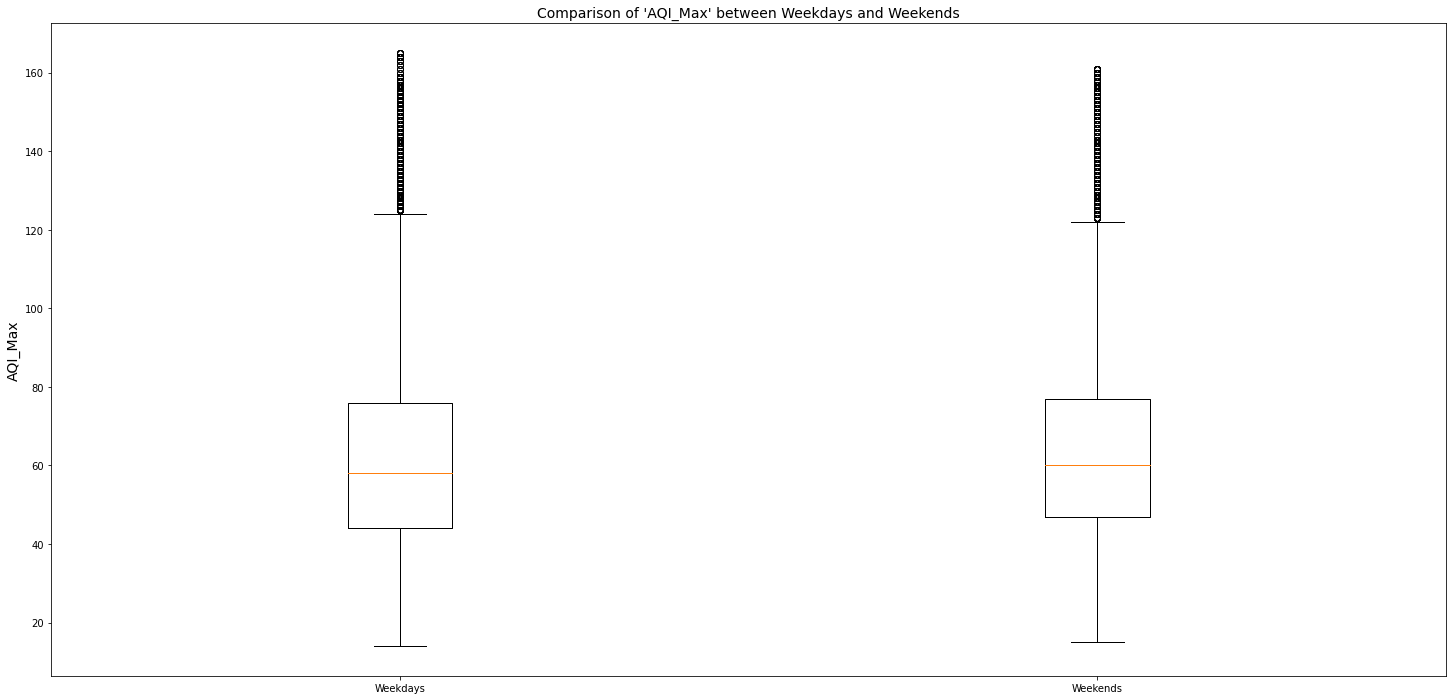

In [13]:
column_of_interest = 'AQI_Max'
fig, axs = plt.subplots(figsize=(25, 12))

axs.boxplot([weekdays[column_of_interest], weekends[column_of_interest]], labels=['Weekdays', 'Weekends'])
axs.set_title(f"Comparison of '{column_of_interest}' between Weekdays and Weekends", fontsize=14)
axs.set_ylabel(column_of_interest, fontsize=14)
plt.show()

- The differences between weekdays and weekends are not easily observable on the boxplot. 
- Let's apply statistical tests to determine if there is a statistically significant difference in AQI_Max values observed between weekdays and weekends.

#### Kolmogorov-Smirnov (KS) Test for Normality

In [14]:
ks_stat_weekdays, ks_p_weekdays = kstest(weekdays['AQI_Max'], 'norm')
print(f"Kolmogorov-Smirnov Test for Weekdays Data:\nStatistic: {ks_stat_weekdays}, P-Value: {ks_p_weekdays}")
if ks_p_weekdays > 0.05:
    print("Weekdays AQI_Max data seems to be normally distributed.")
else:
    print("Weekdays AQI_Max data does not appear to be normally distributed.")

ks_stat_weekends, ks_p_weekends = kstest(weekends['AQI_Max'], 'norm')
print(f"\nKolmogorov-Smirnov Test for Weekends Data:\nStatistic: {ks_stat_weekends}, P-Value: {ks_p_weekends}")
if ks_p_weekends > 0.05:
    print("Weekends AQI_Max data seems to be normally distributed.")
else:
    print("Weekends AQI_Max data does not appear to be normally distributed.")

Kolmogorov-Smirnov Test for Weekdays Data:
Statistic: 1.0, P-Value: 0.0
Weekdays AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Weekends Data:
Statistic: 1.0, P-Value: 0.0
Weekends AQI_Max data does not appear to be normally distributed.


- Let's observe how far the data sets are from normal distribution with histograms.

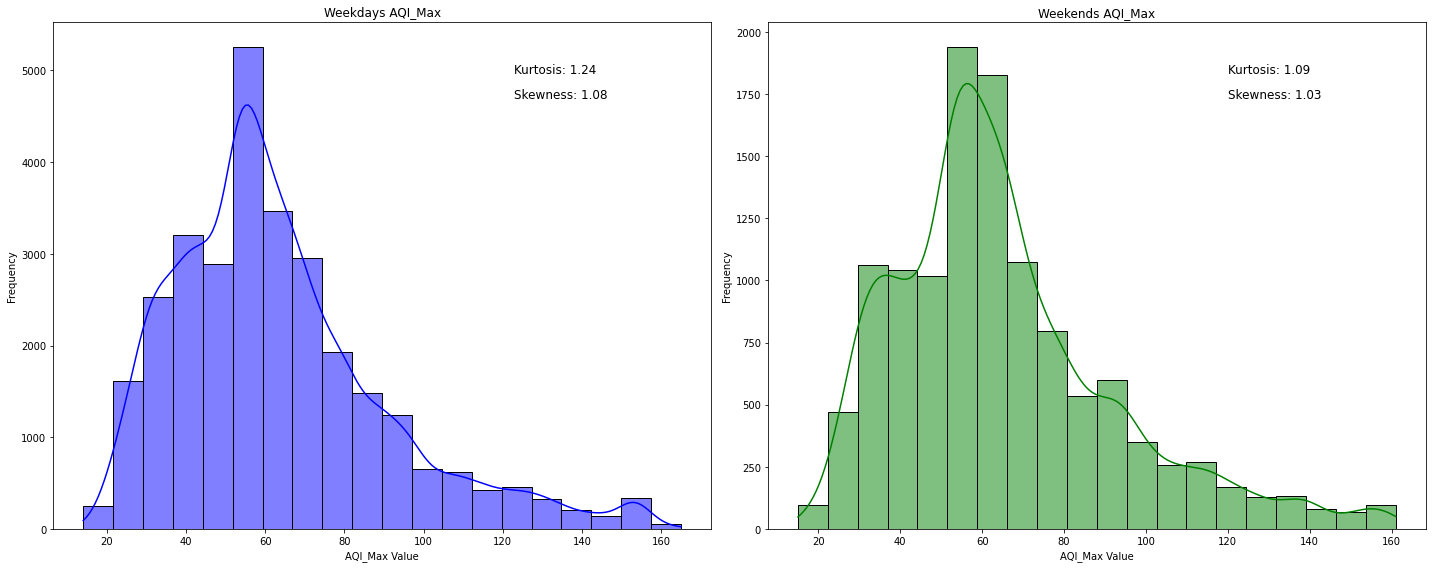

In [15]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(weekdays['AQI_Max'], bins=20, color='blue', kde=True)
plt.title("Weekdays AQI_Max")
plt.xlabel('AQI_Max Value')
plt.ylabel('Frequency')

weekdays_kurtosis = kurtosis(weekdays['AQI_Max'])
weekdays_skewness = skew(weekdays['AQI_Max'])

plt.text(0.7, 0.9, f'Kurtosis: {weekdays_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Skewness: {weekdays_skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(weekends['AQI_Max'], bins=20, color='green', kde=True)
plt.title("Weekends AQI_Max")
plt.xlabel('AQI_Max Value')
plt.ylabel('Frequency')

weekends_kurtosis = kurtosis(weekends['AQI_Max'])
weekends_skewness = skew(weekends['AQI_Max'])

plt.text(0.7, 0.9, f'Kurtosis: {weekends_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Skewness: {weekends_skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()

Weekdays (Blue):

- The distribution is skewed to the right (positive skewness).
- The kurtosis value indicates a more pointed peak (leptokurtic) than the normal distribution.

Weekends (Green):

- The distribution is also skewed to the right (positive skewness) but slightly less than the weekdays.
- The kurtosis value also suggests a distribution with a more pointed peak (leptokurtic) compared to the normal distribution.

In summary, AQI_Max values for both weekdays and weekends deviate from a normal distribution. The skewness and kurtosis values provide quantitative insights into how these distributions differ from the normal distribution. Both distributions tend to have flatter peaks than a standard normal distribution.

Since the data does not comply with normal distribution, let's apply the Mann-Whitney U test.

#### Mann-Whitney U Test

In [16]:
def perform_mannwhitneyu_test(data1, data2, label1, label2):
    stat, p = mannwhitneyu(data1, data2)
    print(f"Mann-Whitney U Test between {label1} and {label2} Data:")
    print("U Statistic:", stat)
    print("P-Value:", p)
    if p < 0.05:
        print(f"There is a statistically significant difference between {label1} and {label2} AQI_Max values.\n")
    else:
        print(f"There is no statistically significant difference between {label1} and {label2} AQI_Max values.\n")

perform_mannwhitneyu_test(weekdays['AQI_Max'], weekends['AQI_Max'], "Weekdays", "Weekends")

Mann-Whitney U Test between Weekdays and Weekends Data:
U Statistic: 172799270.5
P-Value: 1.0035175516015737e-11
There is a statistically significant difference between Weekdays and Weekends AQI_Max values.



- On weekends, higher AQI_Max values are observed compared to weekdays, and this difference is statistically significant. 
- There could be several reasons for this, such as reduced industrial activities, increased leisure activities, and traffic patterns during weekends. 

### Effect Size for Mann-Whitney U Test

In [17]:
def compute_effect_size(U, n1, n2):
    r = 1 - (2 * U) / (n1 * n2)
    return r

U = 172799270.5
n1_weekdays = len(weekdays)
n2_weekends = len(weekends)
r = compute_effect_size(U, n1_weekdays, n2_weekends)
print(f"Effect Size (r) for Weekdays vs. Weekends: {r:.4f}")

Effect Size (r) for Weekdays vs. Weekends: 0.0424


The calculated effect size (r=0.0424), suggests a small magnitude of difference between AQI_Max values for weekdays and weekends.

- While the Mann-Whitney U test pointed out a statistically significant difference between these two periods, the practical implications of this difference need further consideration. 
- A slight change in AQI_Max may not always translate to perceptible changes in air quality or immediate health risks. 
- Factors like persistent sources of pollution, weather conditions, and regional influences could play a role in these observed AQI_Max values. 
- Thus, while there's a statistical distinction between weekdays and weekends, whether this distinction leads to noticeable environmental or health implications would require a more comprehensive analysis.

## Comparison of Different Days of the Week

In [18]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in days_of_week:
    mean_aqi = df_aqi[df_aqi['DayOfWeek'] == i]['AQI_Max'].mean()
    median_aqi = df_aqi[df_aqi['DayOfWeek'] == i]['AQI_Max'].median()
    print(f'Average of AQI_Max value on {i}: {mean_aqi:.2f}')
    print(f'Median of AQI_Max value on {i}: {median_aqi:.2f}')
    print('-'*41)

Average of AQI_Max value on Monday: 64.78
Median of AQI_Max value on Monday: 59.00
-----------------------------------------
Average of AQI_Max value on Tuesday: 64.92
Median of AQI_Max value on Tuesday: 60.00
-----------------------------------------
Average of AQI_Max value on Wednesday: 62.64
Median of AQI_Max value on Wednesday: 58.00
-----------------------------------------
Average of AQI_Max value on Thursday: 61.41
Median of AQI_Max value on Thursday: 56.00
-----------------------------------------
Average of AQI_Max value on Friday: 62.52
Median of AQI_Max value on Friday: 59.00
-----------------------------------------
Average of AQI_Max value on Saturday: 64.34
Median of AQI_Max value on Saturday: 60.00
-----------------------------------------
Average of AQI_Max value on Sunday: 65.60
Median of AQI_Max value on Sunday: 60.00
-----------------------------------------


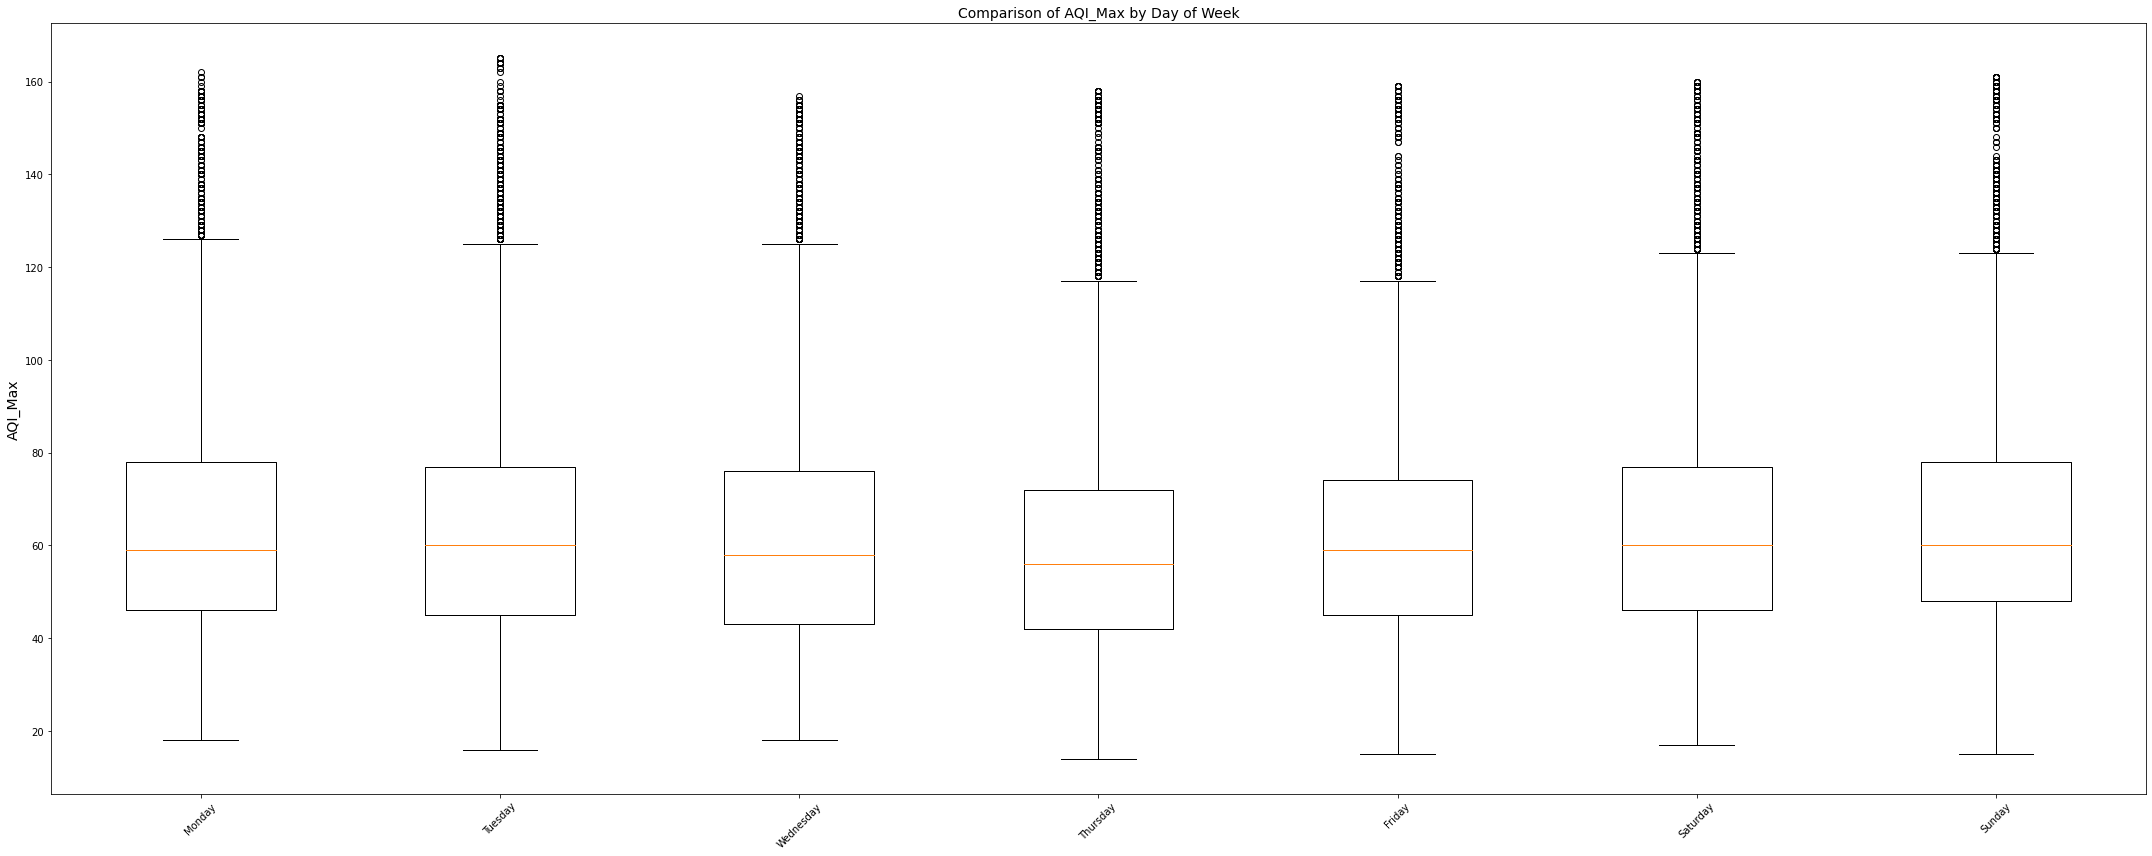

In [19]:
data_to_plot = [df_aqi[df_aqi['DayOfWeek'] == day]['AQI_Max'] for day in days_of_week]

plt.figure(figsize=(30, 12))
plt.boxplot(data_to_plot, labels=days_of_week)
plt.title('Comparison of AQI_Max by Day of Week', fontsize=14)
plt.ylabel('AQI_Max', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Kolmogorov-Smirnov (KS) Test for Normality

In [20]:
for day in days_of_week:
    day_data = df_aqi[df_aqi['DayOfWeek'] == day]['AQI_Max']
    ks_stat, ks_p = kstest(day_data, 'norm')
    
    print(f"Kolmogorov-Smirnov Test for {day} Data:")
    print(f"Statistic: {ks_stat}, P-Value: {ks_p}")
    
    if ks_p > 0.05:
        print(f"{day} AQI_Max data seems to be normally distributed.")
    else:
        print(f"{day} AQI_Max data does not appear to be normally distributed.")
    print()

Kolmogorov-Smirnov Test for Monday Data:
Statistic: 1.0, P-Value: 0.0
Monday AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Tuesday Data:
Statistic: 1.0, P-Value: 0.0
Tuesday AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Wednesday Data:
Statistic: 1.0, P-Value: 0.0
Wednesday AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Thursday Data:
Statistic: 1.0, P-Value: 0.0
Thursday AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Friday Data:
Statistic: 1.0, P-Value: 0.0
Friday AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Saturday Data:
Statistic: 1.0, P-Value: 0.0
Saturday AQI_Max data does not appear to be normally distributed.

Kolmogorov-Smirnov Test for Sunday Data:
Statistic: 1.0, P-Value: 0.0
Sunday AQI_Max data does not appear to be normally distributed.



- Let's observe how far the data sets are from normal distribution with histograms.

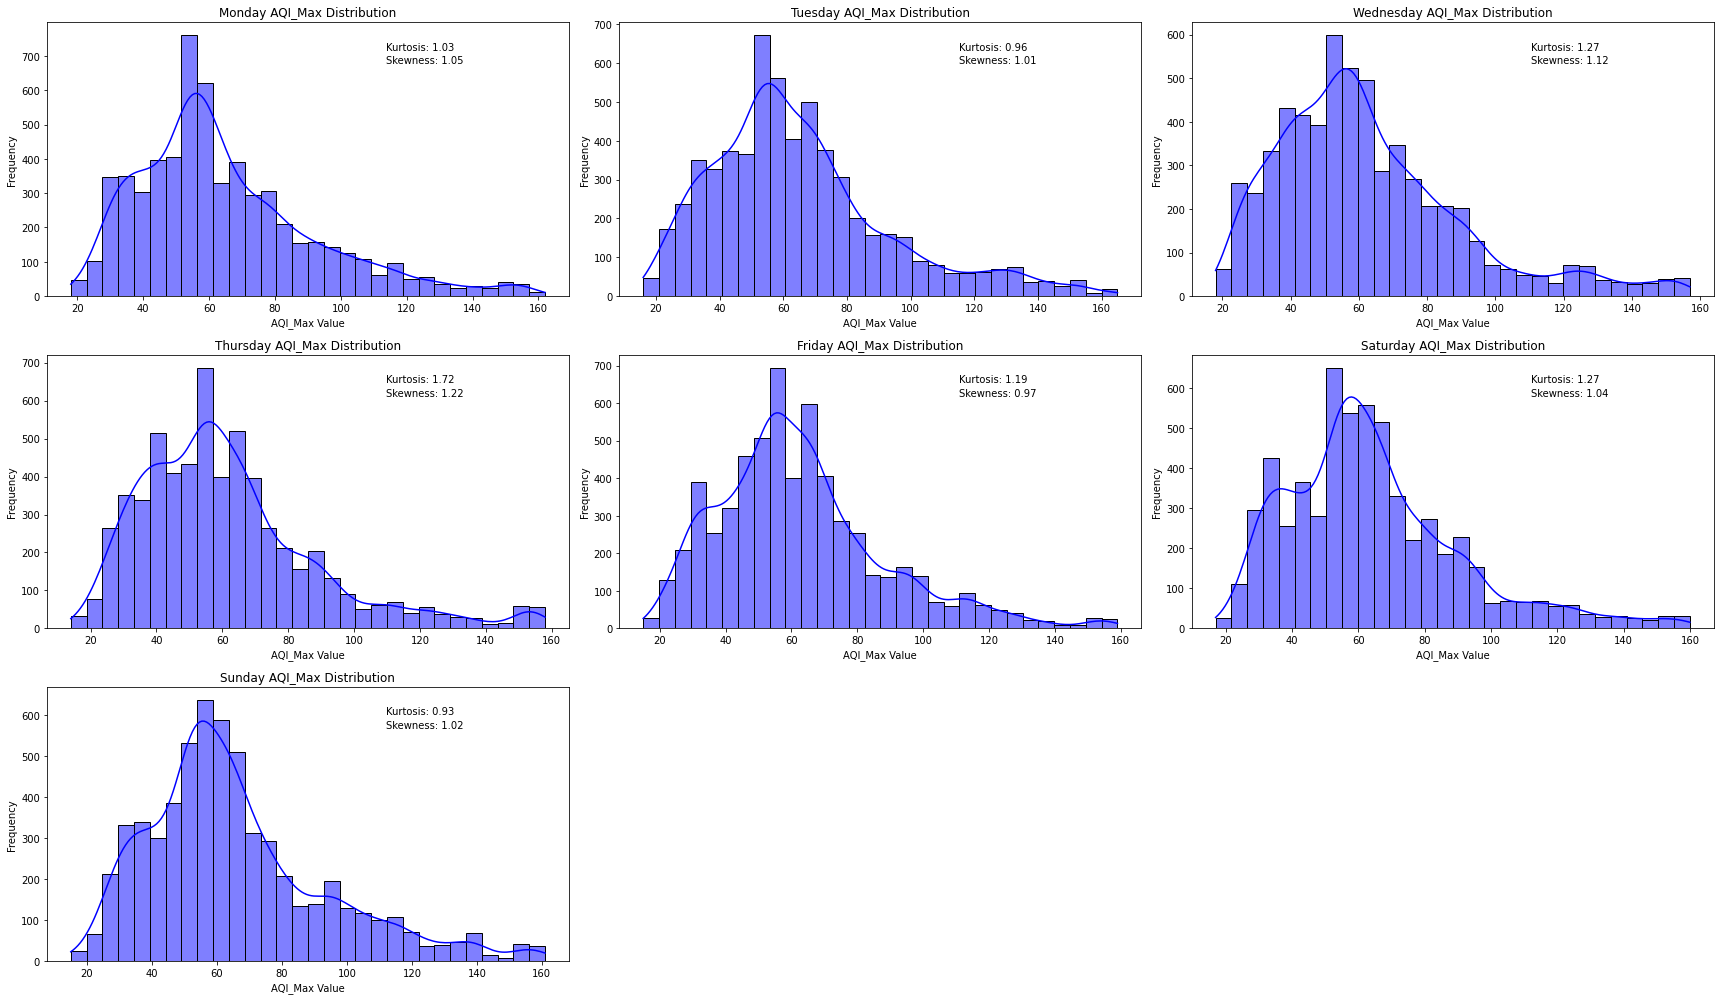

In [21]:
plt.figure(figsize=(24, 14))

for index, day in enumerate(days_of_week, 1):
    plt.subplot(3, 3, index)
    day_data = df_aqi[df_aqi['DayOfWeek'] == day]['AQI_Max']
    sns.histplot(day_data, bins=30, kde=True, color='blue')
    
    day_kurtosis = kurtosis(day_data)
    day_skewness = skew(day_data)
    
    plt.text(0.65, 0.9, f'Kurtosis: {day_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.65, 0.85, f'Skewness: {day_skewness:.2f}', transform=plt.gca().transAxes, fontsize=10)
    
    plt.title(f'{day} AQI_Max Distribution', fontsize=12)
    plt.xlabel('AQI_Max Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Monday:

- The distribution is slightly skewed to the right (positive skewness).
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.

Tuesday:

- The distribution is slightly skewed to the right.
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.

Wednesday:

- The distribution is skewed to the right rather than symmetric.
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.

Thursday:

- The distribution is more prominently skewed to the right.
- The kurtosis value indicates an even more pronounced pointed distribution (leptokurtic) than the normal distribution.

Friday:

- The distribution is skewed to the right, but slightly less so compared to some other days.
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.

Saturday:

- The distribution is slightly skewed to the right.
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.

Sunday:

- The distribution is slightly skewed to the right.
- The kurtosis value shows a more pointed distribution (leptokurtic) than the normal distribution.

In summary, AQI_Max values for all days of the week deviate from a normal distribution. Skewness and kurtosis values provide a quantitative perspective on how these distributions differ from the normal distribution. All days exhibit a leptokurtic distribution and are skewed to the right.

#### Kruskal-Wallis Test

- Let's apply the Kruskal-Wallis test to determine if there is a significant difference between the days of the week.

In [22]:
results = []

for day in days_of_week:
    day_data = df_aqi[df_aqi['DayOfWeek'] == day]['AQI_Max']
    results.append(day_data)

statistic, p_value = kruskal(*results)

print(f"Kruskal-Wallis Test Statistic: {statistic:.2f}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The Null Hypothesis (H0) is rejected. There is a statistically significant difference between the days of the week.")
else:
    print("The Null Hypothesis (H0) is accepted. There is no statistically significant difference between the days of the week.")

Kruskal-Wallis Test Statistic: 133.14
P-Value: 2.8020850480554843e-26
The Null Hypothesis (H0) is rejected. There is a statistically significant difference between the days of the week.


- When we examine the results, there is a statistically significant difference between the days of the week.

#### Eta Squared (η²) Effect Size

In [23]:
H = 133.14  # Kruskal-Wallis test statistic
n_total = len(df_aqi) # total sample size

eta_squared_day = H / (n_total - 1) # compute Eta squared (η^2)
eta_squared_day

0.0031656284178990914

- The calculated Eta squared value of η² = 0.0032 (approximately) indicates a small effect size. This suggests that only about 0.32% (approximately) of the variance in AQI_Max values across different days of the week is due to the differences between these days.

- In summary, while we identified a statistically significant difference in AQI_Max values across different days of the week, the effect size, as indicated by the Eta squared value, suggests that the practical magnitude of this difference is quite limited.

## Comparison of Different Months of the Year

In [24]:
df_aqi['Month'] = df_aqi['Date'].dt.month_name()
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg_aqi = df_aqi.groupby('Month')['AQI_Max'].mean().reindex(monthly_order)
monthly_median_aqi = df_aqi.groupby('Month')['AQI_Max'].median().reindex(monthly_order)

monthly_stats = pd.DataFrame({
    "Average AQI": monthly_avg_aqi,
    "Median AQI": monthly_median_aqi
})

monthly_stats.style.set_table_attributes("border=1").set_caption("Monthly AQI Statistics")

,Average AQI,Median AQI
Month,,
January,77.501882,74.000000
February,75.590426,73.000000
March,65.693817,64.000000
April,61.178333,60.000000
May,56.384140,56.000000
June,53.663611,55.000000
July,45.831989,46.000000
August,47.273043,46.000000
September,48.924653,48.000000


According to these values, the lowest air quality index was observed in July, August and September, while the highest air quality index was observed in November and December.

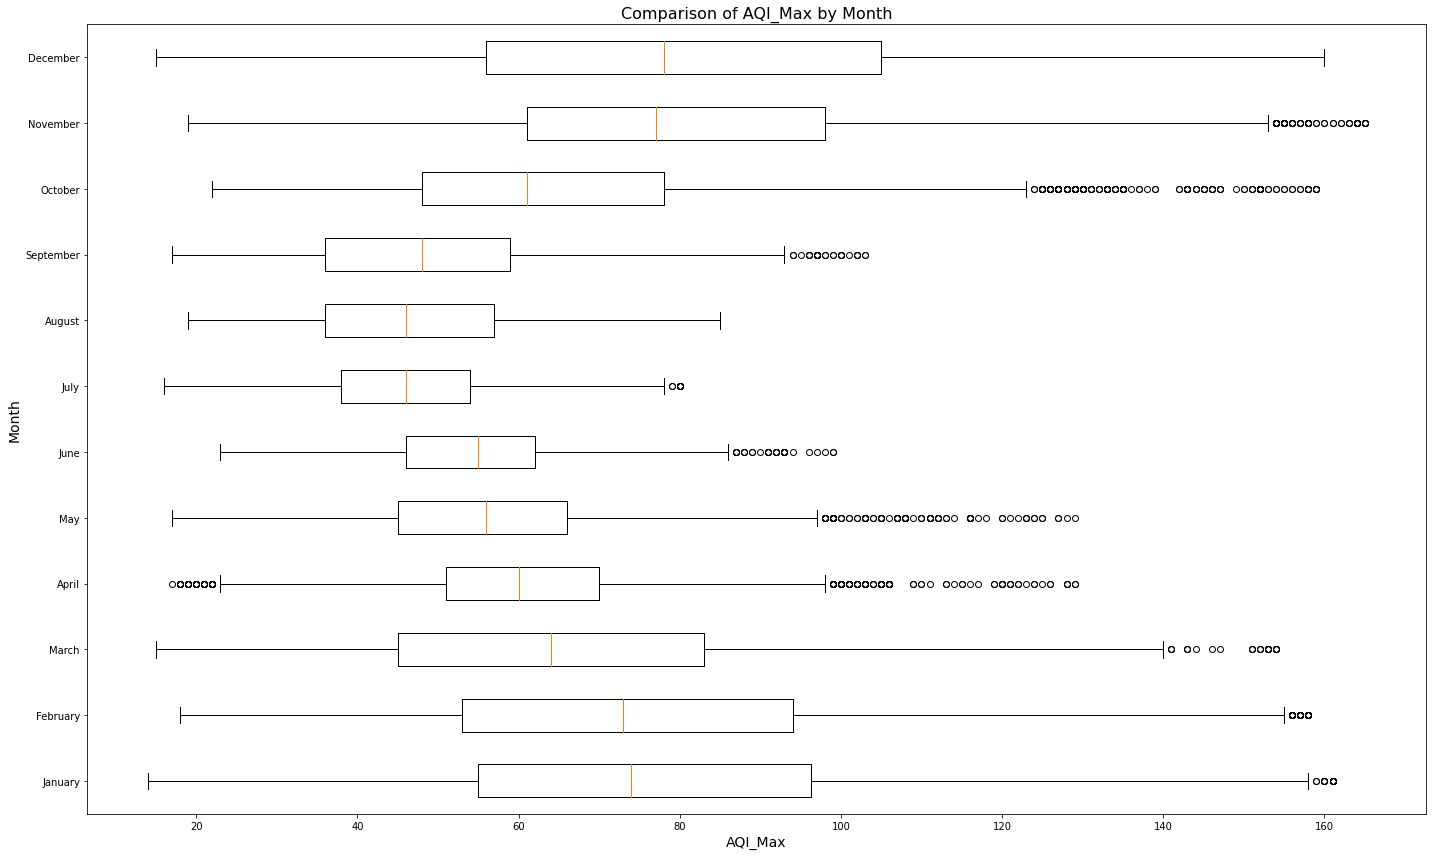

In [25]:
months = monthly_median_aqi.index.tolist()
data_to_plot = [df_aqi[df_aqi['Month'] == month]['AQI_Max'] for month in months]

plt.figure(figsize=(20, 12))
plt.boxplot(data_to_plot, labels=months, vert=False)
plt.title('Comparison of AQI_Max by Month', fontsize=16)
plt.xlabel('AQI_Max', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.tight_layout()
plt.show()

##### Kolmogorov-Smirnov Test for Normality

In [26]:
for month in months:
    month_data = df_aqi[df_aqi['Month'] == month]['AQI_Max']
    ks_stat, ks_p = kstest(month_data, 'norm')
    
    print(f"Kolmogorov-Smirnov Test for {month} Data:")
    print(f"Statistic: {ks_stat}, P-Value: {ks_p}")

Kolmogorov-Smirnov Test for January Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for February Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for March Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for April Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for May Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for June Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for July Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for August Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for September Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for October Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for November Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for December Data:
Statistic: 1.0, P-Value: 0.0


- None of the data is normally distributed.

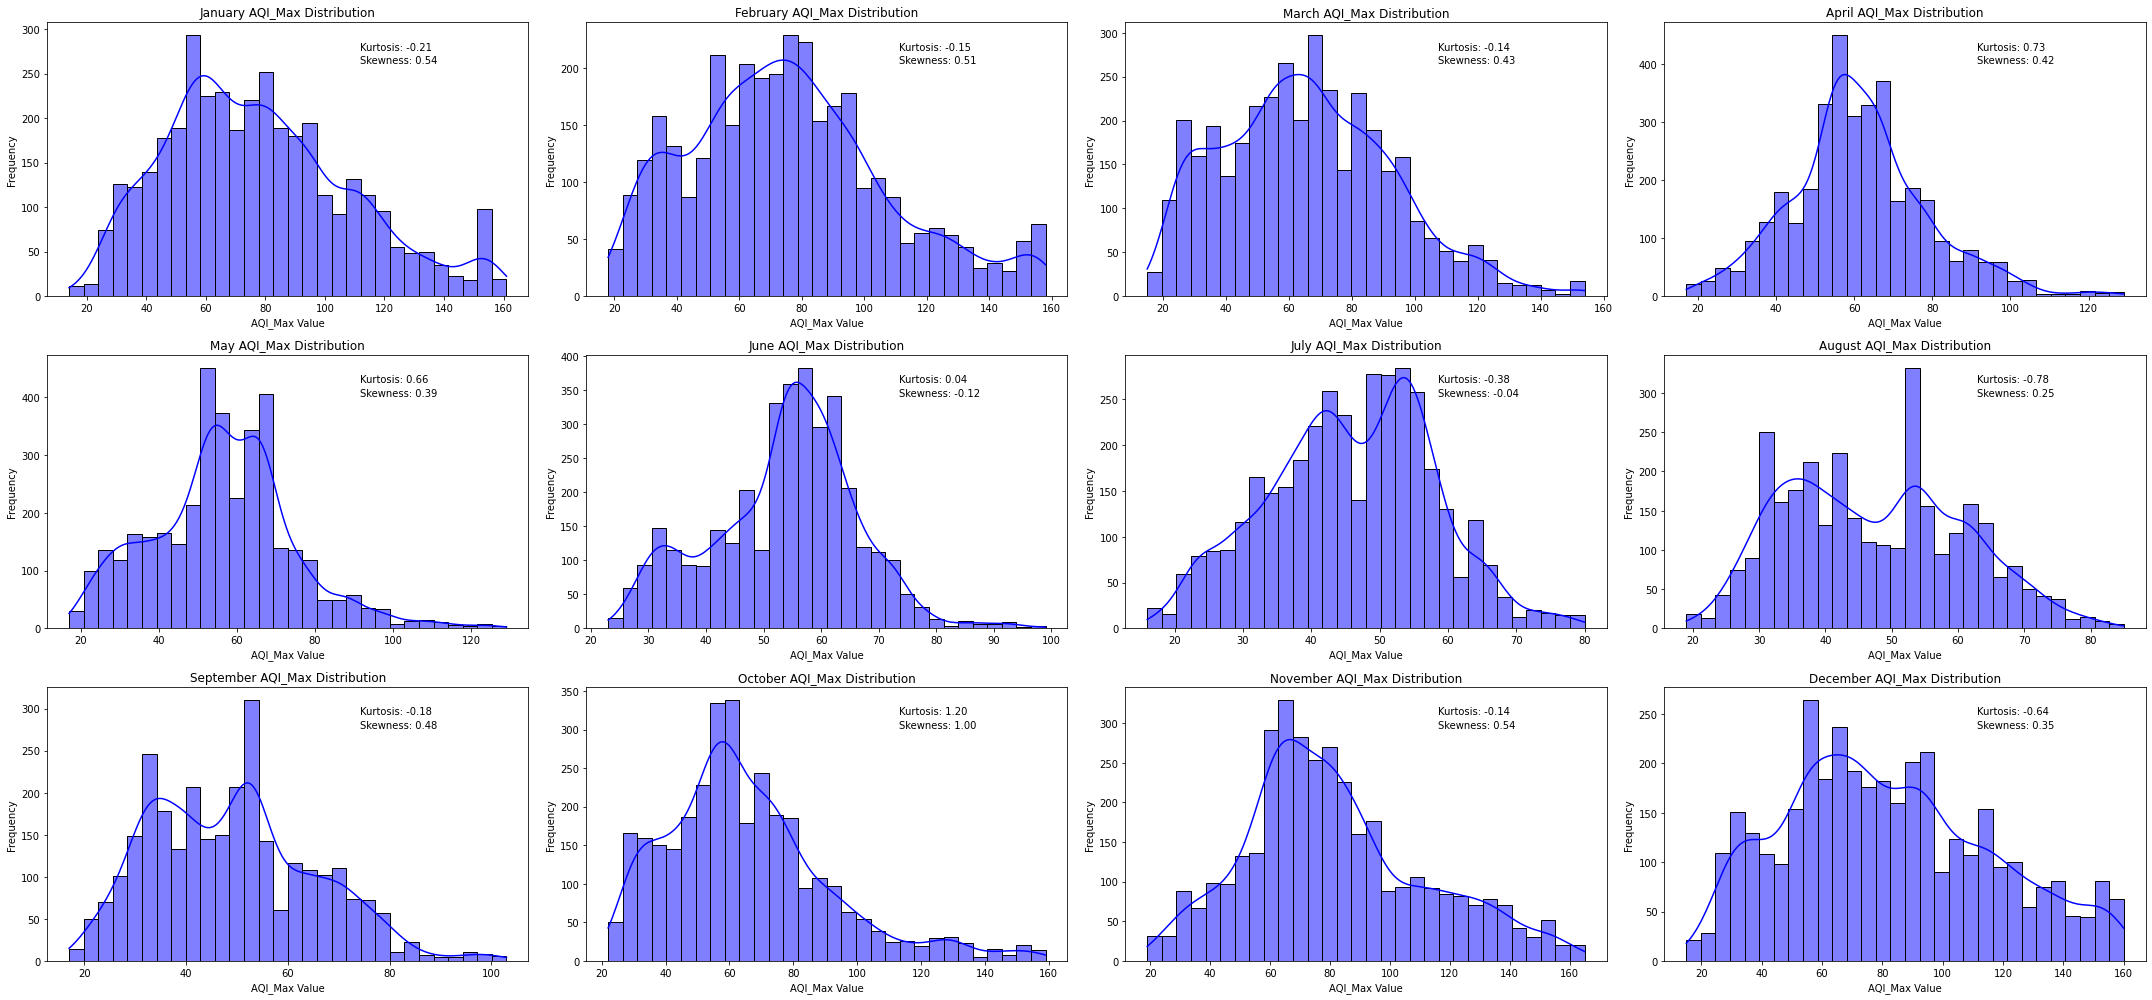

In [27]:
plt.figure(figsize=(30, 14))

for index, month in enumerate(months, 1):
    plt.subplot(3, 4, index)
    month_data = df_aqi[df_aqi['Month'] == month]['AQI_Max']
    sns.histplot(month_data, bins=30, kde=True, color='blue')
    
    month_kurtosis = kurtosis(month_data)
    month_skewness = skew(month_data)
    
    plt.text(0.65, 0.9, f'Kurtosis: {month_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.65, 0.85, f'Skewness: {month_skewness:.2f}', transform=plt.gca().transAxes, fontsize=10)
    
    plt.title(f'{month} AQI_Max Distribution', fontsize=12)
    plt.xlabel('AQI_Max Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Summary:

| Months    | Skewness   | Peak Shape        |
|-----------|------------|-------------------|
| January   | Right Skew | Platykurtic       |
| February  | Right Skew | Platykurtic       |
| March     | Right Skew | Platykurtic       |
| April     | Right Skew | Leptokurtic       |
| May       | Right Skew | Leptokurtic       |
| June      | Left Skew  | Mesokurtic        |
| July      | Left Skew  | Platykurtic       |
| August    | Right Skew | Platykurtic       |
| September | Right Skew | Platykurtic       |
| October   | Right Skew | Leptokurtic       |
| November  | Right Skew | Platykurtic       |
| December  | Right Skew | Platykurtic       |



- Across different months, AQI_Max values deviate from the normal distribution to varying extents. Some months (like April, May, and October) exhibit leptokurtic distributions, suggesting potential outliers or extreme values. Most months, however, show platykurtic distributions with flatter peaks. The skewness values, while generally positive, are relatively small, indicating that the distributions are not heavily skewed in either direction.

#### Kruskal-Wallis Test

In [28]:
statistic, p_value = kruskal(*data_to_plot)

kruskal_wallis_results = {
    "Test Statistic": statistic,
    "P-Value": p_value
}

print(kruskal_wallis_results)

if p_value < 0.05:
    print("\nThe Null Hypothesis (H0) is rejected. There is a statistically significant difference between the months of the year.")
else:
    print("\nThe Null Hypothesis (H0) is accepted. There is no statistically significant difference between the months of the year.")

{'Test Statistic': 8956.771823995481, 'P-Value': 0.0}

The Null Hypothesis (H0) is rejected. There is a statistically significant difference between the months of the year.


#### Eta Squared (η²) Effect Size

In [29]:
H = 8956.771823995481  # Kruskal-Wallis test statistic
n_total = len(df_aqi)  # total number of observations

eta_squared_month = H / (n_total - 1) # eta squared formula
eta_squared_month

0.21296238109266918

- The calculated Eta Squared (η²) value for differences between the months is found to be 0.213. 
- This value indicates that 21.3% of the total variance is explained by the differences between months. 
- Generally, this is considered a large effect size. 
- This demonstrates that the differences in AQI_Max values across months are not only statistically significant but also practically important.

## Comparison of Different Seasons of the Year

In [30]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_aqi['Season'] = df_aqi['Date'].dt.month.apply(assign_season)

seasonal_avg_aqi = df_aqi.groupby('Season')['AQI_Max'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
seasonal_median_aqi = df_aqi.groupby('Season')['AQI_Max'].median().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

seasonal_stats = pd.DataFrame({
    "Average AQI": seasonal_avg_aqi,
    "Median AQI": seasonal_median_aqi
})

seasonal_stats

,Average AQI,Median AQI
Season,,
Winter,78.303307,75.0
Spring,61.084420,60.0
Summer,48.955473,50.0
Autumn,66.521891,62.0


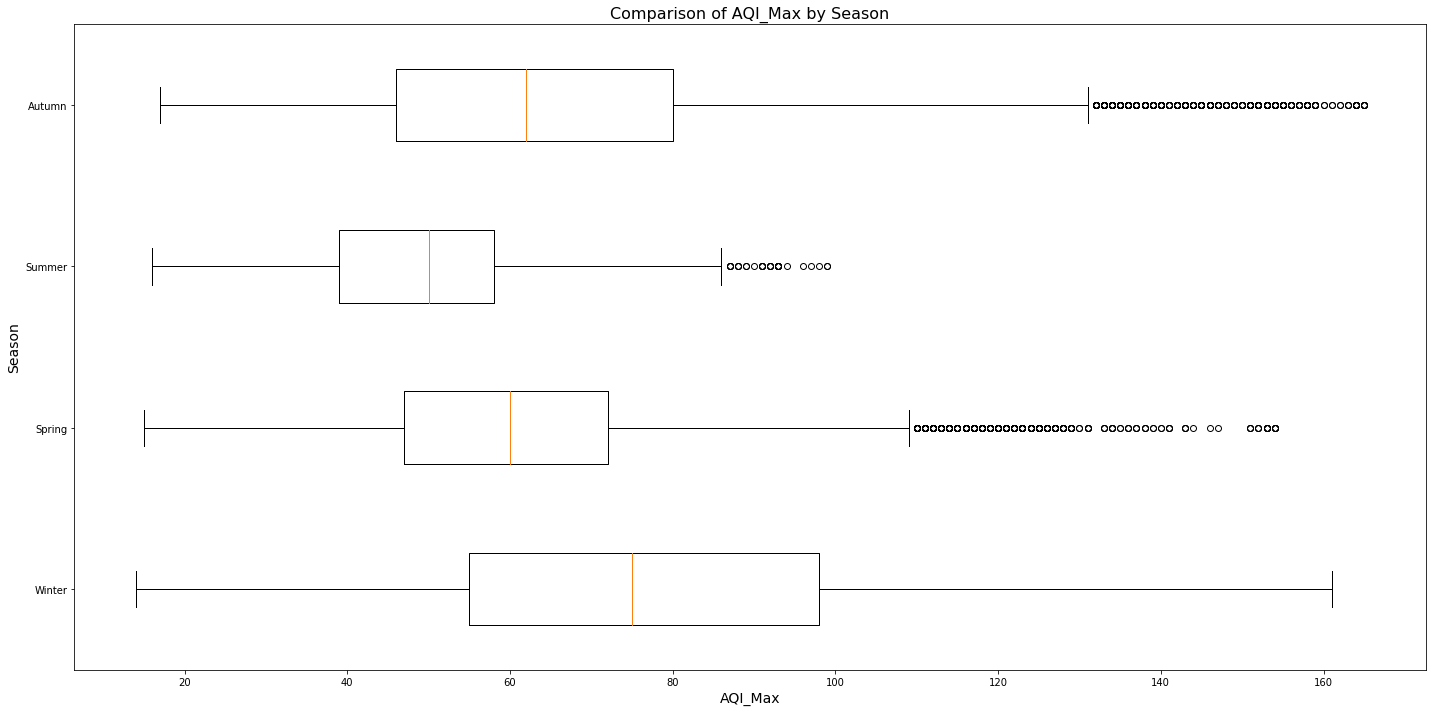

In [35]:
seasons_order = ['Winter', 'Spring', 'Summer', 'Autumn']
data_to_plot = [df_aqi[df_aqi['Season'] == season]['AQI_Max'] for season in seasons_order]

plt.figure(figsize=(20, 10))
plt.boxplot(data_to_plot, labels=seasons_order, vert=False)
plt.title('Comparison of AQI_Max by Season', fontsize=16)
plt.xlabel('AQI_Max', fontsize=14)
plt.ylabel('Season', fontsize=14)
plt.tight_layout()
plt.show()

##### Kolmogorov-Smirnov Test for Normality

In [36]:
for season in seasons_order:
    season_data = df_aqi[df_aqi['Season'] == season]['AQI_Max']
    ks_stat, ks_p = kstest(season_data, 'norm')
    
    print(f"Kolmogorov-Smirnov Test for {season} Data:")
    print(f"Statistic: {ks_stat}, P-Value: {ks_p}")

Kolmogorov-Smirnov Test for Winter Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for Spring Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for Summer Data:
Statistic: 1.0, P-Value: 0.0
Kolmogorov-Smirnov Test for Autumn Data:
Statistic: 1.0, P-Value: 0.0


- None of the data is normally distributed.

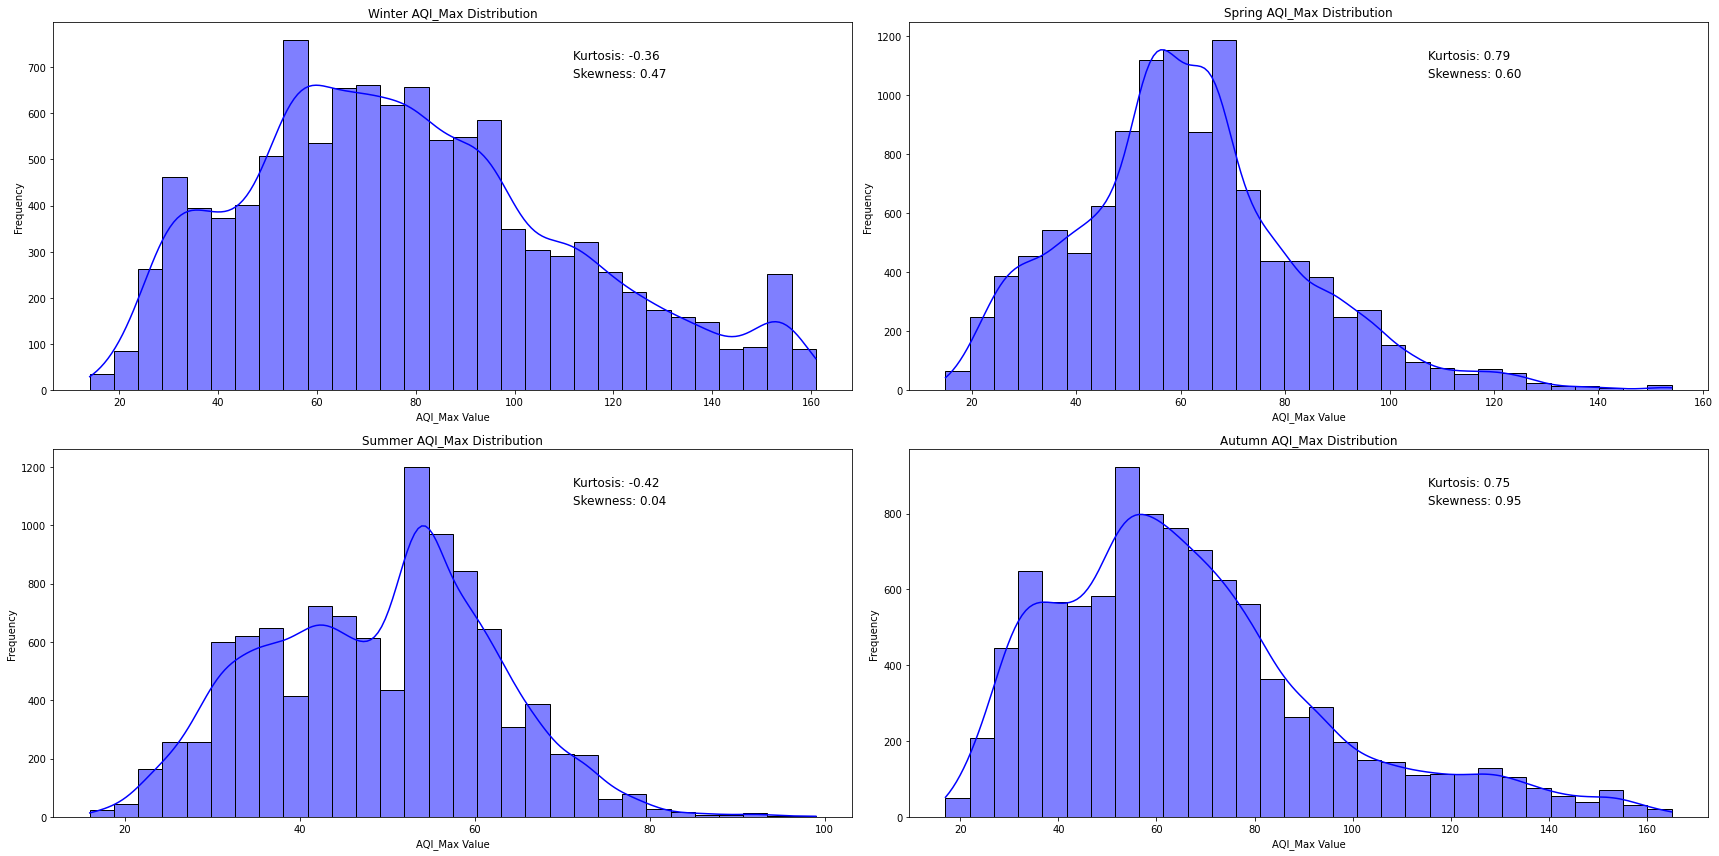

In [37]:
plt.figure(figsize=(24, 12))

for index, season in enumerate(seasons_order, 1):
    plt.subplot(2, 2, index)
    season_data = df_aqi[df_aqi['Season'] == season]['AQI_Max']
    sns.histplot(season_data, bins=30, kde=True, color='blue')
    
    season_kurtosis = kurtosis(season_data)
    season_skewness = skew(season_data)
    
    plt.text(0.65, 0.9, f'Kurtosis: {season_kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.65, 0.85, f'Skewness: {season_skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)
    
    plt.title(f'{season} AQI_Max Distribution', fontsize=12)
    plt.xlabel('AQI_Max Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Winter:
- The AQI_Max distribution for winter shows a rightward skew (positive skewness), suggesting that there are days with particularly poor air quality during this season.
- The kurtosis value indicates a distribution with a flatter peak (platykurtic) compared to the normal distribution.

Spring:
- The AQI_Max distribution for spring also exhibits a rightward skew (positive skewness), indicating occasional days with notably worse air quality.
- The kurtosis value suggests a more pointed peak (leptokurtic) than the normal distribution, indicating a higher frequency of average AQI_Max values with some extreme values on either side.

Summer:
- The AQI_Max distribution for summer is approximately symmetric with a slight rightward skew.
- Its kurtosis value indicates a flatter peak (platykurtic) in comparison to the normal distribution.

Autumn:
- The distribution for AQI_Max values in autumn is skewed to the right (positive skewness), indicating that the air quality tends to be notably worse on certain days during this season.
- The kurtosis value also suggests a more pointed peak (leptokurtic) than the normal distribution, highlighting a higher occurrence of average AQI_Max values and some extreme values.


In summary, while each season shows some deviation from a normal distribution in terms of AQI_Max values, the skewness and kurtosis values provide insights into how air quality varies within each season.

#### Kruskal-Wallis Test

In [38]:
statistic, p_value = kruskal(*data_to_plot)

kruskal_wallis_results = {
    "Test Statistic": statistic,
    "P-Value": p_value
}

print(kruskal_wallis_results)

if p_value < 0.05:
    print("\nThe Null Hypothesis (H0) is rejected. There is a statistically significant difference between the seasons.")
else:
    print("\nThe Null Hypothesis (H0) is accepted. There is no statistically significant difference between the seasons.")

{'Test Statistic': 5994.696208308257, 'P-Value': 0.0}

The Null Hypothesis (H0) is rejected. There is a statistically significant difference between the seasons.


#### Eta Squared (η²) Effect Size

In [39]:
H = 5994.696208308257  # Kruskal-Wallis test statistic
n_total = len(df_aqi) # total number of observations

eta_squared_season = H / (n_total - 1) # eta squared formula
eta_squared_season

0.14253402939531734

- The Eta Squared (η²) value calculated for the differences between the seasons is 0.1425. 
- This value indicates that approximately 14.25% of the total variance is explained by the differences between the seasons. 
- Generally, this is considered a medium effect size. 
- This suggests that the differences in AQI_Max values between seasons are not just statistically significant but are also practically meaningful.